In [2]:
import netcomp as nc

In [3]:
from ipywidgets import interact

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
import networkx as nx

In [5]:
import random

#ensure I generate the same random graphs each time I run this notebook
desired_num_of_graphs = 6
random.seed(9001)
randomseeds = [random.randint(1,100) for i in range(0,desired_num_of_graphs)]
print(randomseeds)

[5, 39, 33, 9, 73, 33]


C:\Users\nandy\Anaconda3\envs\test_env\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\nandy\Anaconda3\envs\test_env\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
C:\Users\nandy\Anaconda3\envs\test_env\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\nandy\Anaconda3\envs\test_env\lib\site-packages\matplotlib\__init__.py:910: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it f

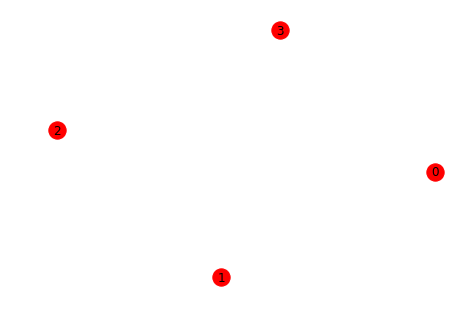

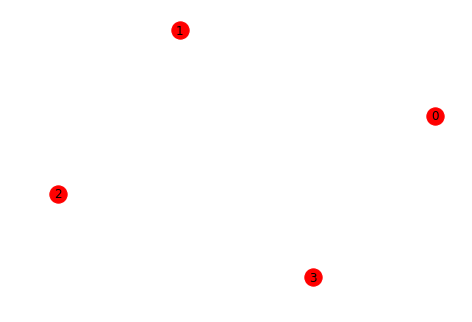

C:\Users\nandy\Anaconda3\envs\test_env\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\nandy\Anaconda3\envs\test_env\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


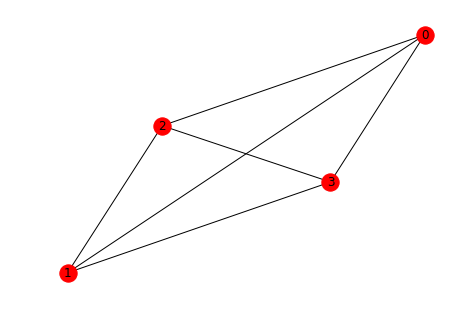

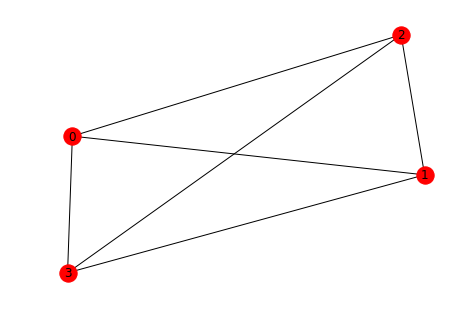

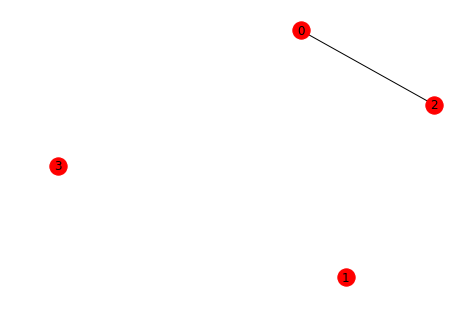

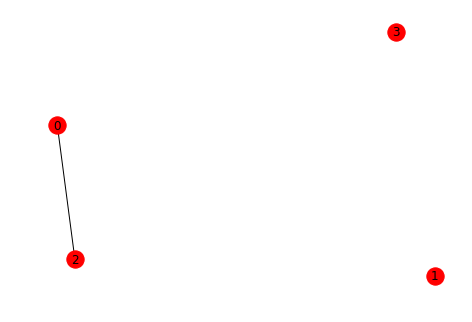

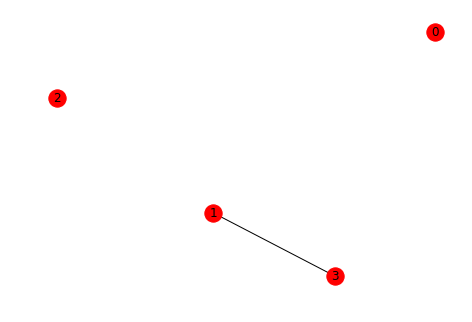

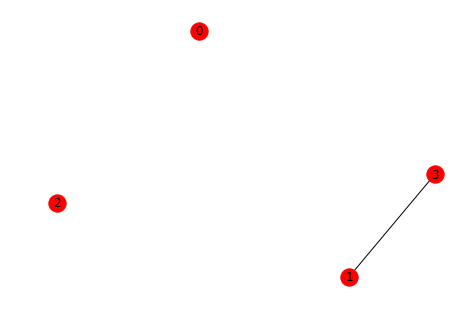

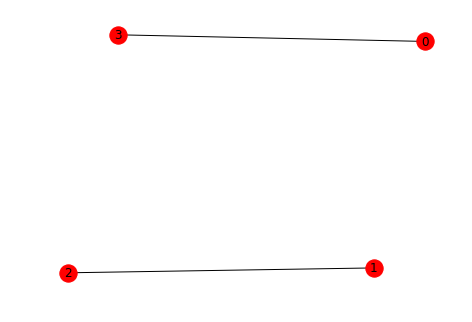

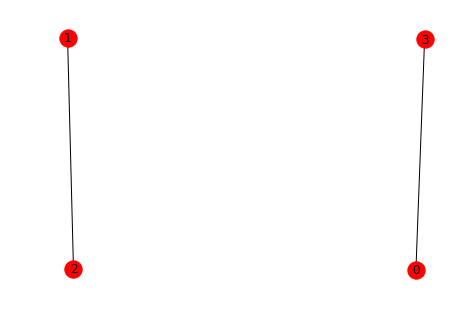

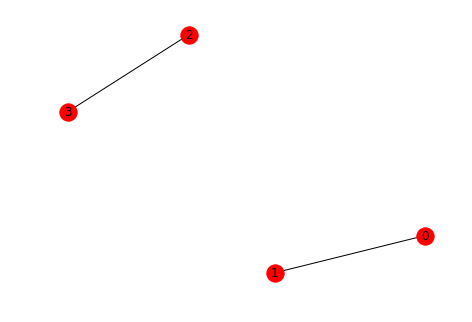

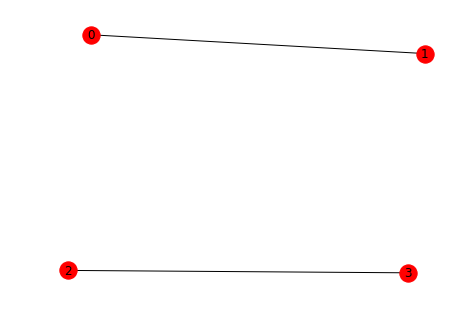

In [6]:
deg_list = [[0,0,0,0],[3,3,3,3],[1,0,1,0],[0,1,0,1],[1,1,1,1],[1,1,1,1]] 
def plot_graph(deg_list, rand_seed):
    G = nx.random_degree_sequence_graph(sequence=deg_list, seed=rand_seed) #changed from configuration model (which had self loops and parallel edges)
    nx.draw(G, with_labels=True)
    A = nx.adjacency_matrix(G)
    plt.show()
    return G

#create dataset of graphs with degree distribution
dataset_adj = {}
dataset_G = {}
count = 0
for i in randomseeds:
    dataset_G[count] = plot_graph(deg_list[count], i)
    dataset_adj[count] = nx.adjacency_matrix(plot_graph(deg_list[count], i))
    count += 1

In [7]:
#create dataframe of distances using netcomp
def graphsim_lambda(data):
    ## data is a dictionary that contains generated graph adjacency matricies
    ## simfunc is a function from the netcomp library
    df = pd.DataFrame()
    for key1 in data:
        for key2 in data:
            A1 = data[key1]
            A2 = data[key2]
            d = nc.lambda_dist(A1, A2, kind='laplacian')
            df.loc[key1, key2] = d
    normalized_df = 1 - (df - df.min().min())/(df.max().max() - df.min().min())
    return normalized_df
graphsim_lambda(dataset_adj)

,0,1,2,3,4,5
0,1.000000,0.000000,0.711325,0.711325,0.591752,0.591752
1,0.000000,1.000000,0.133975,0.133975,0.292893,0.292893
2,0.711325,0.133975,1.000000,1.000000,0.711325,0.711325
3,0.711325,0.133975,1.000000,1.000000,0.711325,0.711325
4,0.591752,0.292893,0.711325,0.711325,1.000000,1.000000
5,0.591752,0.292893,0.711325,0.711325,1.000000,1.000000


In [8]:
def graphsim_ged(data):
    ## data is a dictionary that contains generated graphs
    ## simfunc is a function from the netcomp library
    df = pd.DataFrame()
    for key1 in data:
        for key2 in data:
            A1 = data[key1]
            A2 = data[key2]
            d = nc.edit_distance(A1, A2)
            df.loc[key1, key2] = d
    normalized_df = 1 - (df - df.min().min())/(df.max().max() - df.min().min())
    return normalized_df
graphsim_ged(dataset_adj)

,0,1,2,3,4,5
0,1.000000,0.000000,0.833333,0.833333,0.666667,0.666667
1,0.000000,1.000000,0.166667,0.166667,0.333333,0.333333
2,0.833333,0.166667,1.000000,0.666667,0.500000,0.500000
3,0.833333,0.166667,0.666667,1.000000,0.500000,0.500000
4,0.666667,0.333333,0.500000,0.500000,1.000000,0.333333
5,0.666667,0.333333,0.500000,0.500000,0.333333,1.000000


In [9]:
def graphsim_dc(data):
    ## data is a dictionary that contains generated graphs
    ## simfunc is a function from the netcomp library
    df = pd.DataFrame()
    for key1 in data:
        for key2 in data:
            A1 = data[key1]
            A2 = data[key2]
            d = nc.deltacon0(A1, A2)
            df.loc[key1, key2] = d
    normalized_df = 1 - (df - df.min().min())/(df.max().max() - df.min().min())
    return normalized_df
graphsim_dc(dataset_adj)

,0,1,2,3,4,5
0,1.000000,0.0000,0.834458,0.834458,0.668916,0.668916
1,0.000000,1.0000,0.153100,0.153100,0.306200,0.306200
2,0.834458,0.1531,1.000000,0.668916,0.515816,0.515816
3,0.834458,0.1531,0.668916,1.000000,0.515816,0.515816
4,0.668916,0.3062,0.515816,0.515816,1.000000,0.362716
5,0.668916,0.3062,0.515816,0.515816,0.362716,1.000000


GRAPHS 2 & 3 

C:\Users\nandy\Anaconda3\envs\test_env\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\nandy\Anaconda3\envs\test_env\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\nandy\Anaconda3\envs\test_env\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\nandy\Anaconda3\envs\test_env\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
C:\Users

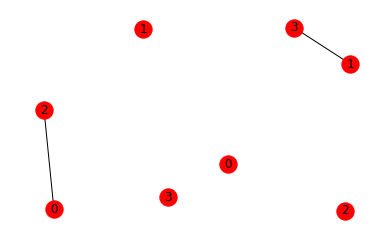

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2)
nx.draw(dataset_G[2], ax=axes[0], with_labels=True)
nx.draw(dataset_G[3], ax=axes[1], with_labels=True)

Spectral (similarity = 1): The spectral distance considers these 2 graphs exactly the same 
DeltaCon and GED do not consider the graphs to be identical unless they are exactly the same. This is why the spectral similarity is skewed compared to the other graph similarity measures. For the small graphs (4 nodes), the DeltaCon and GED measures have the same results (slightly different numbers).

DeltaCon and GED consider the graphs below to be more similar to each other than the graphs above.

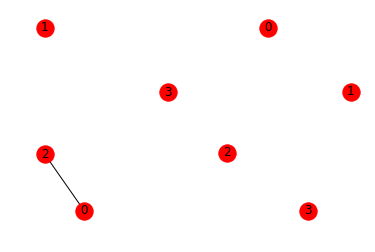

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)
nx.draw(dataset_G[2], ax=axes[0], with_labels=True)
nx.draw(dataset_G[0], ax=axes[1], with_labels=True)

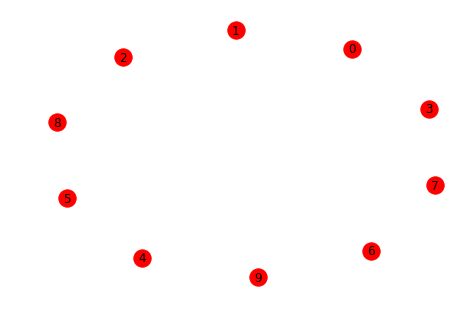

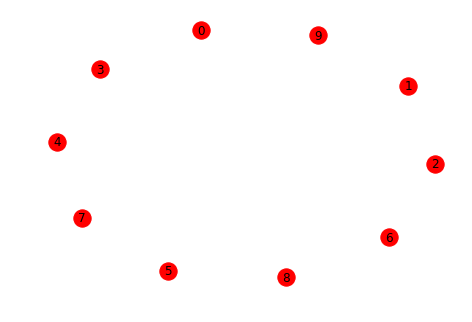

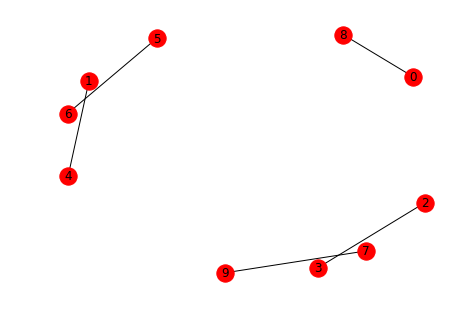

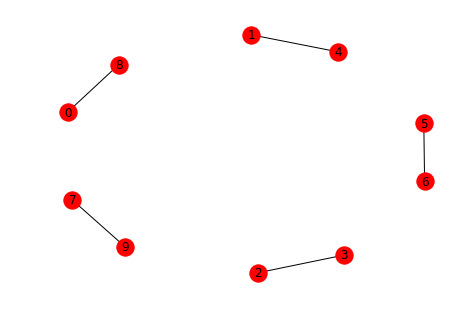

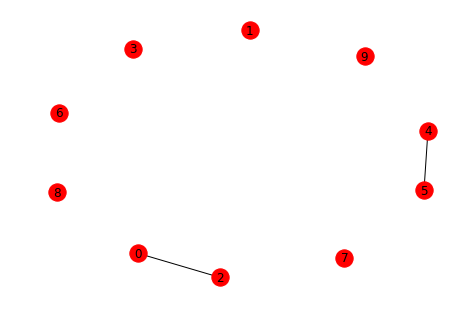

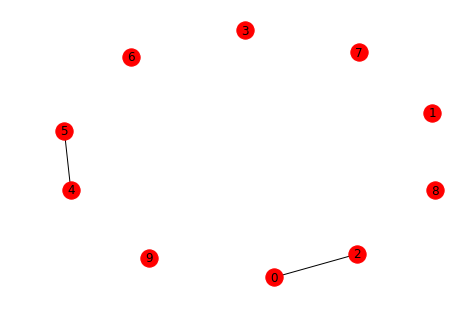

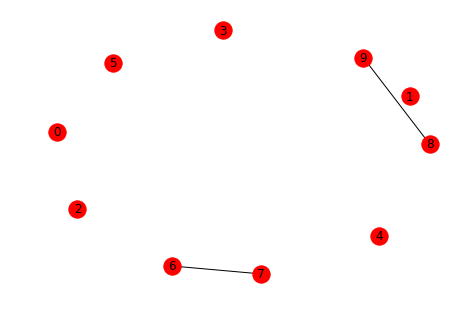

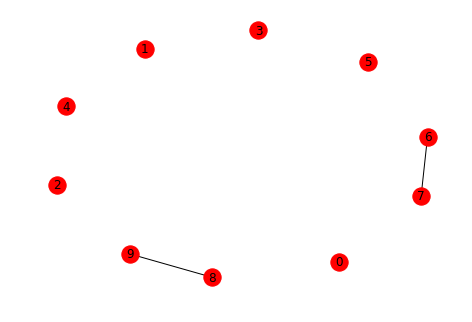

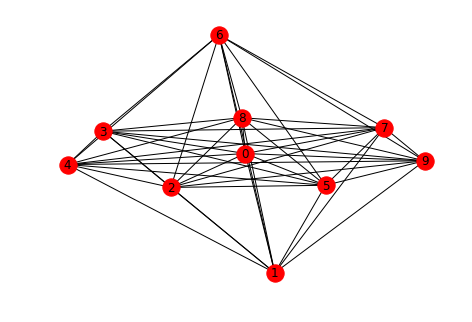

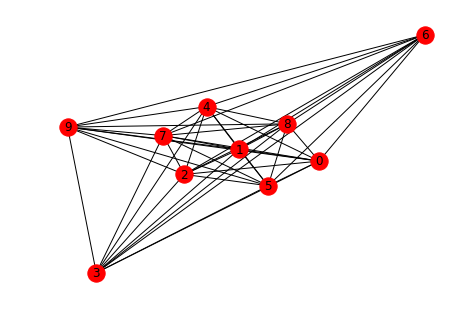

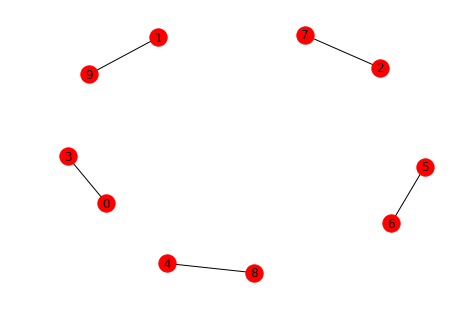

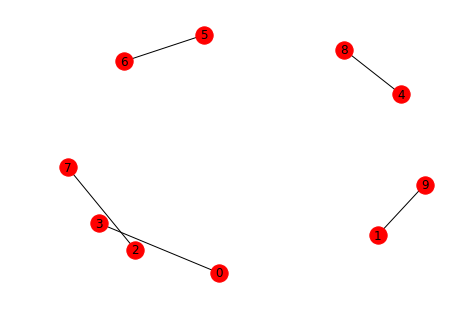

In [12]:
larger_deg_list = [[0,0,0,0,0,0,0,0,0,0],[1,1,1,1,1,1,1,1,1,1],[1,0,1,0,1,1,0,0,0,0],[0,0,0,0,0,0,1,1,1,1],
                   [9,9,9,9,9,9,9,9,9,9],[1,1,1,1,1,1,1,1,1,1]] 
#create largerdataset of graphs with degree distribution
l_dataset_adj = {}
l_dataset_G = {}
count = 0
for i in randomseeds:
    l_dataset_G[count] = plot_graph(larger_deg_list[count], i)
    l_dataset_adj[count] = nx.adjacency_matrix(plot_graph(larger_deg_list[count], i))
    count += 1

In [13]:
graphsim_lambda(l_dataset_adj)

,0,1,2,3,4,5
0,1.000000,0.850929,0.905719,0.905719,0.000000,0.850929
1,0.850929,1.000000,0.884530,0.884530,0.105573,1.000000
2,0.905719,0.884530,1.000000,1.000000,0.040834,0.884530
3,0.905719,0.884530,1.000000,1.000000,0.040834,0.884530
4,0.000000,0.105573,0.040834,0.040834,1.000000,0.105573
5,0.850929,1.000000,0.884530,0.884530,0.105573,1.000000


In [14]:
graphsim_ged(l_dataset_adj)

,0,1,2,3,4,5
0,1.000000,0.888889,0.955556,0.955556,0.000000,0.888889
1,0.888889,1.000000,0.844444,0.844444,0.111111,0.822222
2,0.955556,0.844444,1.000000,0.911111,0.044444,0.844444
3,0.955556,0.844444,0.911111,1.000000,0.044444,0.844444
4,0.000000,0.111111,0.044444,0.044444,1.000000,0.111111
5,0.888889,0.822222,0.844444,0.844444,0.111111,1.000000


In [15]:
graphsim_dc(l_dataset_adj)

,0,1,2,3,4,5
0,1.000000,0.895175,0.958070,0.958070,0.000000,0.895175
1,0.895175,1.000000,0.856396,0.856396,0.096947,0.838582
2,0.958070,0.856396,1.000000,0.916140,0.038779,0.856396
3,0.958070,0.856396,0.916140,1.000000,0.038779,0.856396
4,0.000000,0.096947,0.038779,0.038779,1.000000,0.096947
5,0.895175,0.838582,0.856396,0.856396,0.096947,1.000000


C:\Users\nandy\Anaconda3\envs\test_env\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\nandy\Anaconda3\envs\test_env\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\nandy\Anaconda3\envs\test_env\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\nandy\Anaconda3\envs\test_env\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
C:\Users

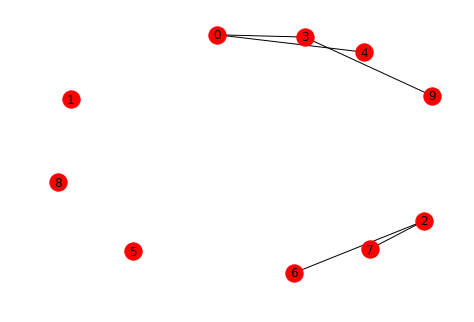

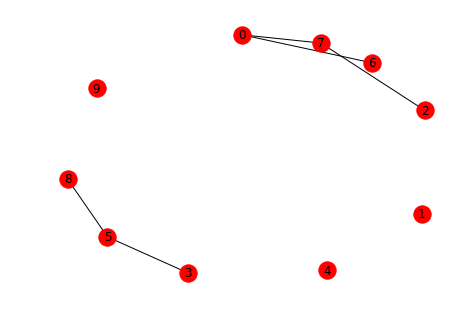

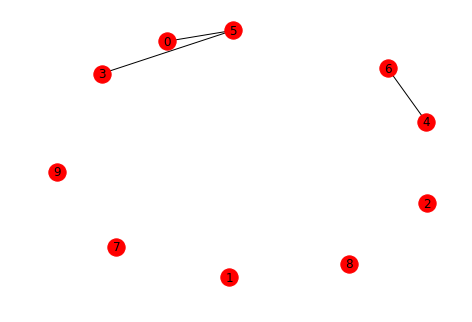

Edit 8.0 8.0 6.0
DC 11.06700322110895 10.216199321061856 9.2252996054224
Spectral 4.7289702320677874e-15 1.874758284622697 1.8747582846226953


In [16]:
G1 = nx.erdos_renyi_graph(10,0.1, seed=2)
G2 = nx.erdos_renyi_graph(10,0.1, seed=3)
G3 = nx.erdos_renyi_graph(10,0.1, seed=4)
G4 = nx.planted_partition_graph(2,50,0.19,0.01)
nx.draw(G1, with_labels=True )
plt.show()
nx.draw(G2, with_labels=True)
plt.show()
nx.draw(G3, with_labels=True)
plt.show()

A1,A2,A3 = [nx.adjacency_matrix(G) for G in [G1,G2,G3]]

d0 = nc.edit_distance(A1,A2)
d1 = nc.edit_distance(A1,A3)
d2 = nc.edit_distance(A2,A3)


print("Edit",d0, d1, d2)

d0 = nc.deltacon0(A1,A2)
d1 = nc.deltacon0(A1,A3)
d2 = nc.deltacon0(A2,A3)

print("DC",d0, d1, d2)

d0 = nc.lambda_dist(A1,A2, kind='laplacian')
d1 = nc.lambda_dist(A1,A3, kind='laplacian')
d2 = nc.lambda_dist(A2,A3, kind='laplacian')

print("Spectral",d0, d1, d2)

The spectral distance considers the first very two similar because they both have the same number of unconnected nodes and chains of 4/3. The spectral distance will find structures (i.e. chains) that are the same, even if the exact functions and flows don't match.

For the edit distance, common chains are important (in this case, function-flow pairs). Graphs 1&2 have one common chain, Graphs 3&2 have one common chain, and Graphs 1&3 have no common chains. However, even if there are common chains, it is also affected by the number of unconnected nodes. Graph 3 has a large amount of unconnected nodes compared to Graph 1. For that reason, the edit distance will work well to distinguish between graphs that have high connectivities but not compare systems of different sizes (fewer vs more unconnected nodes).  

A way to distinguish between Edit Distance and DeltaCon? 
Create sets of graphs with different properties & see the distributions:
sub-group by the number of isolates

In [61]:
Adj = [nx.adjacency_matrix(G) for G in Grphs]

In [62]:
Isolates = [len(nx.isolates(G)) for G in Grphs]

In [63]:
fulldata = pd.DataFrame(list(zip(Grphs, Adj, Isolates)), 
               columns =['Graph', 'Adj', 'Isolates']) 
mygroups_list= [(key, subdf) for (key, subdf) in fulldata.groupby('Isolates')]

dc = {}
ed = {}
for i in range(0, len(mygroups_list)):
    sub = mygroups_list[i][1].reset_index()
    deltacon = pd.DataFrame(index=range(0,sub.shape[0]), columns=range(0,sub.shape[0]))
    editdist = pd.DataFrame(index=range(0,sub.shape[0]), columns=range(0,sub.shape[0]))
    for j in range(0,sub.shape[0]):
        for k in range(0,sub.shape[0]):
            deltacon.iloc[j,k] = nc.deltacon0(sub.iloc[j,2],sub.iloc[k,2])
            editdist.iloc[j,k] = nc.edit_distance(sub.iloc[j,2],sub.iloc[k,2])
    dc[i] = deltacon
    ed[i] = editdist

In [64]:
deltaconf = pd.DataFrame(index=range(0,fulldata.shape[0]), columns=range(0,fulldata.shape[0]))
editdistf = pd.DataFrame(index=range(0,fulldata.shape[0]), columns=range(0,fulldata.shape[0]))
for j in range(0,fulldata.shape[0]):
    for k in range(0,fulldata.shape[0]):
        deltaconf.iloc[j,k] = nc.deltacon0(fulldata.iloc[j,1],fulldata.iloc[k,1])
        editdistf.iloc[j,k] = nc.edit_distance(fulldata.iloc[j,1],fulldata.iloc[k,1])

C:\Users\nandy\Anaconda3\envs\test_env\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\nandy\Anaconda3\envs\test_env\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


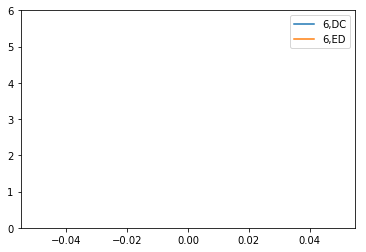

In [26]:
n = 1 #number of disconnected nodes
#sns.kdeplot(np.triu(np.array(1 - (dc[n] - dc[n].min().min())/(dc[n].max().max() - dc[n].min().min())),k=1).flatten(),label='1,DC')
#sns.kdeplot(np.triu(np.array(1 - (ed[n] - ed[n].min().min())/(ed[n].max().max() - ed[n].min().min())),k=1).flatten(), label='1,ED')
n = 0 #number of disconnected nodes
sns.kdeplot(np.triu(np.array(1 - (dc[n] - dc[n].min().min())/(dc[n].max().max() - dc[n].min().min())),k=1).flatten(),label='6,DC')
sns.kdeplot(np.triu(np.array(1 - (ed[n] - ed[n].min().min())/(ed[n].max().max() - ed[n].min().min())),k=1).flatten(),label='6,ED')
plt.ylim(0,6)
plt.legend();

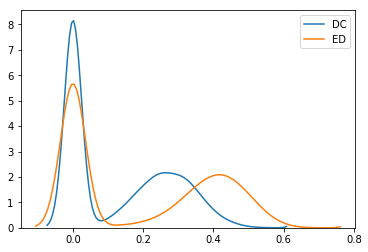

In [65]:
#n=1
#sns.kdeplot(np.triu(np.array(1 - (dc[n] - dc[n].min().min())/(dc[n].max().max() - dc[n].min().min())),k=1).flatten(),label='1,DC')
#n=2
#sns.kdeplot(np.triu(np.array(1 - (dc[n] - dc[n].min().min())/(dc[n].max().max() - dc[n].min().min())),k=1).flatten(),label='2,DC')
#n=3
#sns.kdeplot(np.triu(np.array(1 - (dc[n] - dc[n].min().min())/(dc[n].max().max() - dc[n].min().min())),k=1).flatten(),label='3,DC')
#n=4
#sns.kdeplot(np.triu(np.array(1 - (dc[n] - dc[n].min().min())/(dc[n].max().max() - dc[n].min().min())),k=1).flatten(),label='4,DC')
#n=5
#sns.kdeplot(np.triu(np.array(1 - (dc[n] - dc[n].min().min())/(dc[n].max().max() - dc[n].min().min())),k=1).flatten(),label='5,DC')
#n=6
#sns.kdeplot(np.triu(np.array(1 - (dc[n] - dc[n].min().min())/(dc[n].max().max() - dc[n].min().min())),k=1).flatten(),label='6,DC')
sns.kdeplot(np.triu(np.array(1 - (deltaconf - deltaconf.min().min())/(deltaconf.max().max() - deltaconf.min().min())),k=1).flatten(),label='DC')
sns.kdeplot(np.triu(np.array(1 - (editdistf - editdistf.min().min())/(editdistf.max().max() - editdistf.min().min())),k=1).flatten(),label='ED')


(-0.5, 1.4308788810931385)

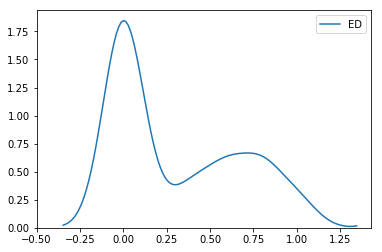

In [34]:
#n=1
#sns.kdeplot(np.triu(np.array(1 - (ed[n] - ed[n].min().min())/(ed[n].max().max() - ed[n].min().min())),k=1).flatten(), label='1,ED')
#n=2
#sns.kdeplot(np.triu(np.array(1 - (ed[n] - ed[n].min().min())/(ed[n].max().max() - ed[n].min().min())),k=1).flatten(), label='2,ED')
#n=3
#sns.kdeplot(np.triu(np.array(1 - (ed[n] - ed[n].min().min())/(ed[n].max().max() - ed[n].min().min())),k=1).flatten(), label='3,ED')
#n=4
#sns.kdeplot(np.triu(np.array(1 - (ed[n] - ed[n].min().min())/(ed[n].max().max() - ed[n].min().min())),k=1).flatten(), label='4,ED')
#n=5
#sns.kdeplot(np.triu(np.array(1 - (ed[n] - ed[n].min().min())/(ed[n].max().max() - ed[n].min().min())),k=1).flatten(), label='5,ED')
#n=6
#sns.kdeplot(np.triu(np.array(1 - (ed[n] - ed[n].min().min())/(ed[n].max().max() - ed[n].min().min())),k=1).flatten(), label='6,ED')
sns.kdeplot(np.triu(np.array(1 - (editdistf - editdistf.min().min())/(editdistf.max().max() - editdistf.min().min())),k=1).flatten(),label='ED')
plt.xlim(-0.5)

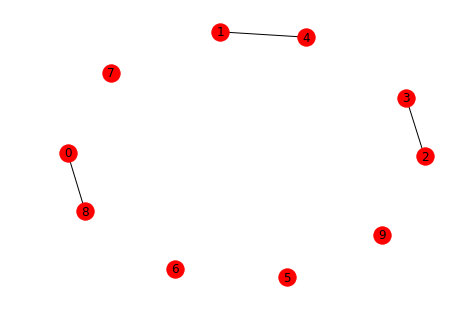

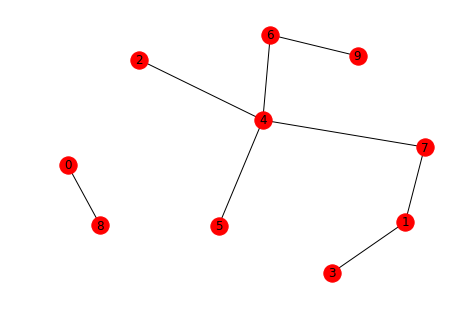

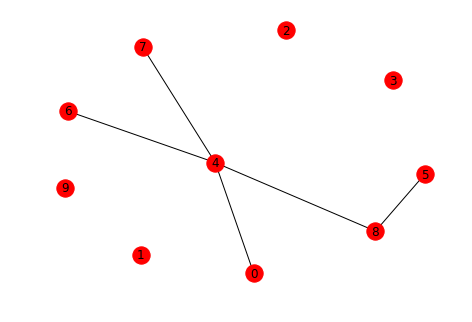

Edit 9.0 9.0
DC 13.049958589822957 13.128285220783035


C:\Users\nandy\Anaconda3\envs\test_env\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\nandy\Anaconda3\envs\test_env\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\nandy\Anaconda3\envs\test_env\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\nandy\Anaconda3\envs\test_env\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
C:\Users

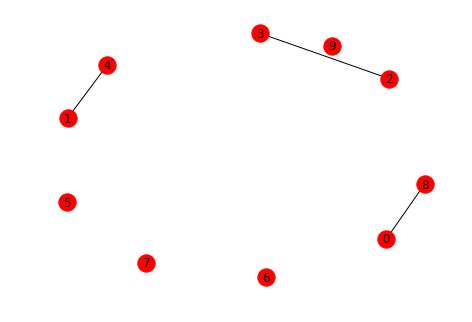

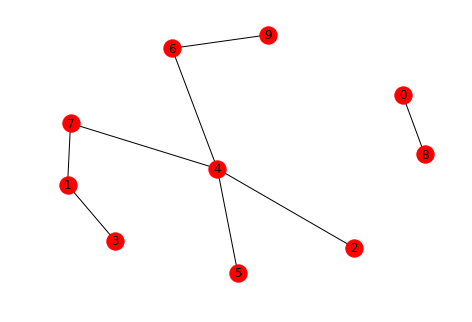

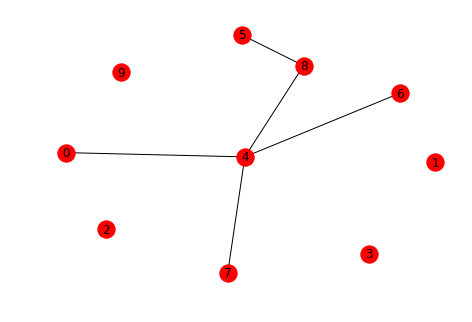

In [42]:
deg1 = [1,1,1,1,1,0,0,0,1,0]
deg2 = [1,2,1,1,4,1,2,2,1,1]
deg3 = [1,0,0,0,4,1,1,1,2,0]
G11 = plot_graph(deg1, 1)
G22 = plot_graph(deg2, 1)
G33 = plot_graph(deg3, 1)
A11,A22,A33 = [nx.adjacency_matrix(G) for G in [G11,G22,G33]]

d0 = nc.edit_distance(A22,A33)
d1 = nc.edit_distance(A22,A11)


print("Edit",d0, d1)

d0 = nc.deltacon0(A22,A33)
d1 = nc.deltacon0(A22,A11)

print("DC",d0, d1)

nx.draw(G11, layout=nx.circular_layout(G11), with_labels=True)
plt.show()
nx.draw(G22, layout=nx.circular_layout(G22), with_labels=True)
plt.show()
nx.draw(G33, layout=nx.circular_layout(G33), with_labels=True)
plt.show()